In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
tests = pd.read_csv('test.csv')

# Analysing dataset

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [4]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,463.000000,466.000000
mean,45.321888,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954104,1.285408
std,15.697936,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.333646,0.452094
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [6]:
data.Dataset.value_counts()

1    333
2    133
Name: Dataset, dtype: int64

In [7]:
data.Gender.value_counts()

Male      361
Female    105
Name: Gender, dtype: int64

In [8]:
data.isnull().values.any()

True

In [9]:
data.shape

(466, 11)

# Preprocessing

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(463, 11)

In [12]:
data.isnull().values.any()

False

In [13]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [14]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [15]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [16]:
def codeGender(g):
    if g=='Male':
        return 0
    else:
        return 1
data['codedGender'] = data['Gender'].apply(codeGender)

In [17]:
data['Globulin'] = data.Albumin/data.Albumin_and_Globulin_Ratio

In [18]:
data.drop(columns=['Gender','Albumin_and_Globulin_Ratio'],inplace=True)

In [19]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset,codedGender,Globulin
0,60,6.3,3.2,314,118,114,6.6,3.7,1,0,2.913386
1,31,0.8,0.2,158,21,16,6.0,3.0,1,1,3.000000
2,60,19.6,9.5,466,46,52,6.1,2.0,1,0,5.000000
3,34,8.7,4.0,298,58,138,5.8,2.4,1,0,3.428571
4,26,0.9,0.2,154,16,12,7.0,3.5,1,1,3.500000


# Studying relationships amongst columns

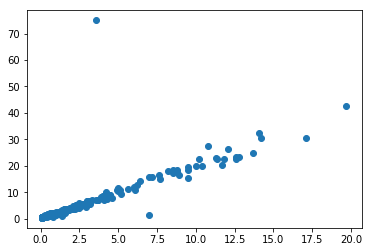

In [20]:
plt.scatter(data.Direct_Bilirubin,data.Total_Bilirubin)

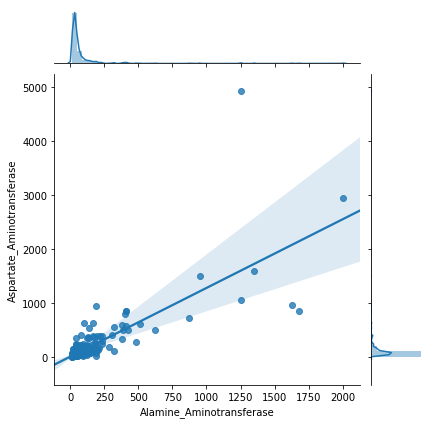

In [21]:
import seaborn as sns
sns.jointplot('Alamine_Aminotransferase','Aspartate_Aminotransferase',data=data,kind='reg')

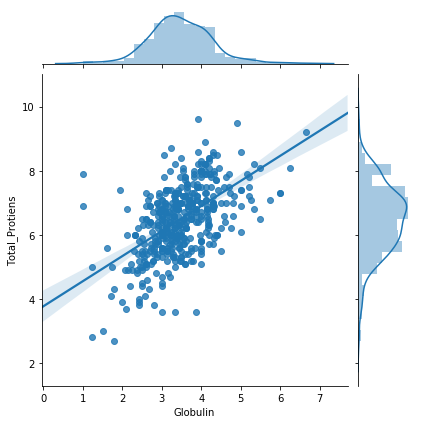

In [22]:
sns.jointplot('Globulin','Total_Protiens',data=data,kind='reg')

# Splitting

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
feature_cols = ['Age',
     'Total_Bilirubin',
     'Alkaline_Phosphotase',
     'Alamine_Aminotransferase',
     'Aspartate_Aminotransferase',
     'Total_Protiens',
     'Albumin',
     'Globulin',
     'codedGender']

In [25]:
X = data[feature_cols]

In [26]:
X.shape

(463, 9)

In [27]:
y = data['Dataset']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(370, 9)
(93, 9)
(370,)
(93,)


# SVM

In [30]:
from sklearn.svm import SVC

In [31]:
svmclf = SVC(gamma='auto',random_state=1,probability=True,decision_function_shape='ovo')

In [32]:
svmclf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False)

In [33]:
yv_pred = svmclf.predict(x_test)

In [34]:
x = yv_pred == y_test
x.value_counts()/len(x)

True     0.741935
False    0.258065
Name: Dataset, dtype: float64

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lgstclf = LogisticRegression(solver='newton-cg',multi_class='multinomial',max_iter=100000,
                        tol=1e-2)

In [37]:
lgstclf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.01, verbose=0, warm_start=False)

In [38]:
yv_pred = lgstclf.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(yv_pred,y_test)

0.7634408602150538

# GradientBoostingClassifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
gbclf = GradientBoostingClassifier(n_estimators=27,loss='exponential',learning_rate=0.1)

In [43]:
gbclf.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=27,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [44]:
yv_pred = gbclf.predict(x_test)

In [45]:
accuracy_score(yv_pred,y_test)

0.7956989247311828

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfclf = RandomForestClassifier(n_estimators=100)

In [48]:
rfclf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
yv_pred = rfclf.predict(x_test)

In [50]:
accuracy_score(yv_pred,y_test)

0.7526881720430108

# Logistic Regression gives low variance in accuracy scores based on different random_states and test sizes. So we chose Logistic Regression

In [51]:
def codeGender(g):
    if g=='Male':
        return 0
    else:
        return 1
tests['codedGender'] = tests['Gender'].apply(codeGender)

In [52]:
tests['Globulin'] = tests.Albumin/tests.Albumin_and_Globulin_Ratio

In [53]:
tests.drop(columns=['Gender','Albumin_and_Globulin_Ratio'],inplace=True)

In [54]:
tests.fillna(tests.mean(),inplace=True)

In [55]:
answers = lgstclf.predict(tests[feature_cols])

In [56]:
type(answers)

numpy.ndarray

In [57]:
resultFile = pd.DataFrame({'predictions':answers})

In [58]:
resultFile.head()

,predictions
0,1
1,1
2,1
3,2
4,1


In [59]:
resultFile.to_csv('predictions.csv')